# Data Viz with Matplotlib 2

Welcome back. Yesterday, we introduced the main (Object Oriented) syntax for `matplotlib`. Today we will take a closer look at how to plot data.

We start by importing the usual packages and specifying the `inline` backend.

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Today, we will be working with extract from the US Baby Names dataset. It contains information about first names' use in the US from 1965 to 2014. Originally, the data is distributed by the Social Security Administration. It contains the frequency and associated Gender for all names given to newborns in the US in any given year from from 1880 -- conditional on the name being used at least 5 time in that year. I downloaded the original data from <a href="https://www.kaggle.com/kaggle/us-baby-names/data?select=NationalNames.csv">Kaggle</a> and re-worked it to minimize `pandas` code in this workshop.

Here we load the data about the use of the name `Barack`.

In [14]:
# Load the data directly from the repository on github
barack_data_url = r'https://raw.githubusercontent.com/non87/python_viz_workshop/main/data/barack.csv'
barack = pd.read_csv(barack_data_url)
# Show the first 5 rows of the barack data
barack.head()

,Unnamed: 0,Id,Count,Year
0,1586035,1586036,5,2007
1,1610732,1610733,52,2008
2,1645079,1645080,69,2009
3,1681104,1681105,28,2010
4,1716858,1716859,15,2011


### Colors, Markers & Lines

We want to visualize whether the popularity of the name "Barack" changed during the Obama presidency. Our data for the x axis will be the `Year` column from the `barack` dataframe. Our y data will be the `Count` column from the same dataframe.

Let's start with the simplest plot. We have already seen all of these commands last time.

Text(0, 0.5, 'Number of newborns named "Obama"')

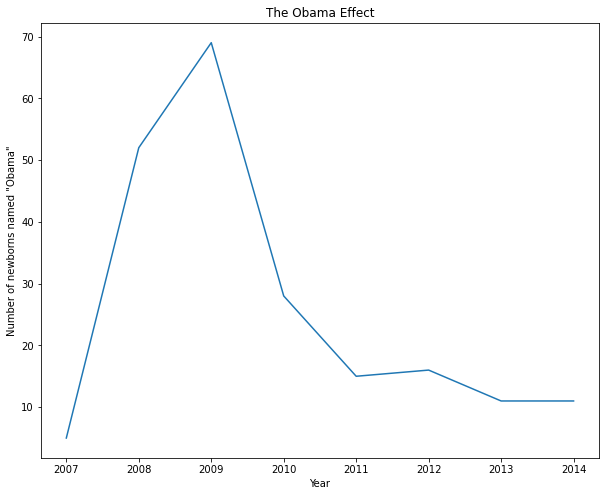

In [15]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(barack['Year'], barack['Count'])
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

#### Colors

The first thing we want to do is to specify a color for our plot. This will show how `matplotlib` handles colors more in general -- something very helpful to know! 

To specify that we want to change the color of our line in the plot, we have to use the argument `color` of the `ax.plot()` method. In general, when there is a color to be changed in `matplotlib`, you can use the argument `color` -- for example, we will see this hold true for the `ax.histogram()` method. 

Yet, what do we pass to the `color` argument? How do we communicate the color we want to `matplotlib`?

In general there are three ways to refer to a color in `matplotlib`:

1. Use a pre-specified color name. `Matplotlib` uses special names to refer to specific colors -- for example, the name "red". You can find the complete list of named colors in this [page from the official documentation](https://matplotlib.org/stable/gallery/color/named_colors.html).

2. Specify the color coordinates through a RGB or RBGA code. This allows for more fine control.

3. Hex strings -- which are another way to specify RGB (or RGBA) coordinates.


 <div class="alert alert-block alert-success">
<b> Specify Colors </b>: For a more complete guide on how to specify colors in <code>matplotlib</code>, check the <a href=https://matplotlib.org/stable/tutorials/colors/colors.html>official tutorial</a>.
        </div>

##### Named Color

Color names are special string that `matplotlib` maps to specific color once you pass such strings in a `color` argument. For example, the string `g` is mapped to a green color if passed in the `color` argument, the string `r` is mapped to a red color, etc.

Text(0, 0.5, 'Number of newborns named "Obama"')

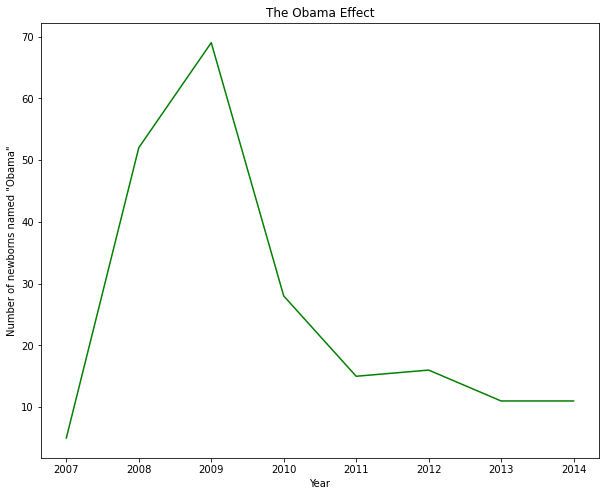

In [16]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color='g')
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### RGB(A)

But sometimes we want to reproduce a specific color and we need more control than a simple string code. In these cases, we can use an RGB color code.

The RGB code is a 3-elements `tuple` (but `matplotlib` will not complain if you pass a `list` or other `tuple`-like objects) specifying the red, green, blue component of the color you want -- following the well known [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model). Unlike many other applications dealing with color specification, `matplotlib` expect you to specify the RGB component as a number from 0 to 1. 

For example, the RGB code `(0,0,1)` has no Red component, no Green component, but goes all in on the Blue component. This is the bluest blue you can get. Another example, the code `(0, 0, 0)` is the darkest black while `(1, 1, 1)` is the whitest white.

In the following example we go for a mid-gray.

Text(0, 0.5, 'Number of newborns named "Obama"')

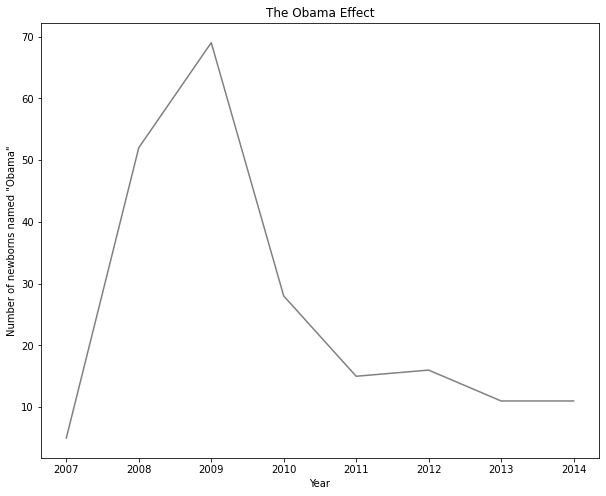

In [19]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5))
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Setting transparency with the alpha parameter

Finally, we can use a RBGA code to specify a color *and* a transparency parameter. The transparency parameter is commonly known as `alpha`. This can be done by simply passing a 4-elements `tuple` (instead of a 3-elements `tuple`) in the `color` argument. As for the RGB components, the `alpha` components should be between 0 (full transparency, no show) to 1 (full opacity)

For example, what happens to the previous plot when we set transparency to 0.5?

Text(0, 0.5, 'Number of newborns named "Obama"')

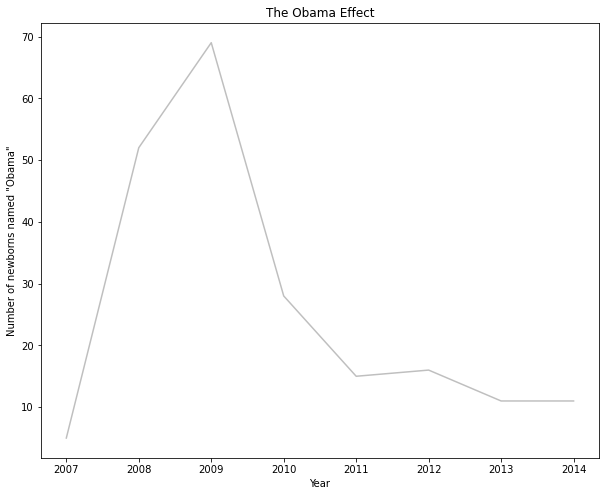

In [18]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5))
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')
# Compare the result with the previous plot

##### Exercise 1

Replicate the same plot as above, but use another named color of your choice from the CSS section of [this page](https://matplotlib.org/stable/gallery/color/named_colors.html).

Text(0, 0.5, 'Number of newborns named "Obama"')

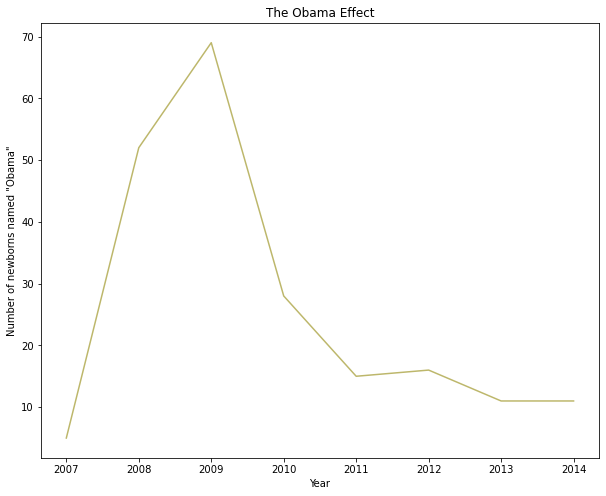

In [20]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# the dark side of khaki
ax.plot(barack['Year'], barack['Count'], color='darkkhaki')
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Markers & Lines: Emphasize data over interpolation

Once the color is set, we may also want to change the line style (and width) or add some markers. Notice that, so far, we are showing the data as a continous function, but we actually only have 8 data-points -- everything else we show is a linear interpolation that `ax.plot()` will add for us by default. The linear interpolation is helpful to see trends in the data, but we may want to remark that actually we only have a sample of 8 points. 

We will do this in 2 stages. First, we will de-emphasize the line: we will dash it, make it thinner and half transparent. This will diminsh the emphasis on the line. This can be achieved through the `color`, `linestyle` and `linewidth` arguments of `ax.plot()`. The `linestyle` and `linewidth` arguments do what their names suggest: `linestyle` accept a string indicating a specific line style, `linewidth` accept a float indicating the width of the line (by default, this argument is set to 1.5). 

Exactly as was the case for the `color` argument, the `linestyle` and `linewidth` argument are not specific to `ax.plot()` and you can use them to change the style and width of lines any time you plot one (be it with the `ax.plot()` method or otherwise).

 <div class="alert alert-block alert-success">
    <b> Linestyle </b>: Above, I simplify the <code>linestyle</code> argument when I write that it accepts strings. You can actually specify your own linestyle by means of <code>tuples</code> code. For example, the "dashed" style used below corresponds to the tuple code <code>(0, (5, 1))</code>: if you substitute the string <code>"dashed"</code> with <code>(0, (5, 1))</code>, you will obtain no change. You can check the <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html>official tutorial</a> for more information on this way of specifying linestyles.
        </div>

Text(0, 0.5, 'Number of newborns named "Obama"')

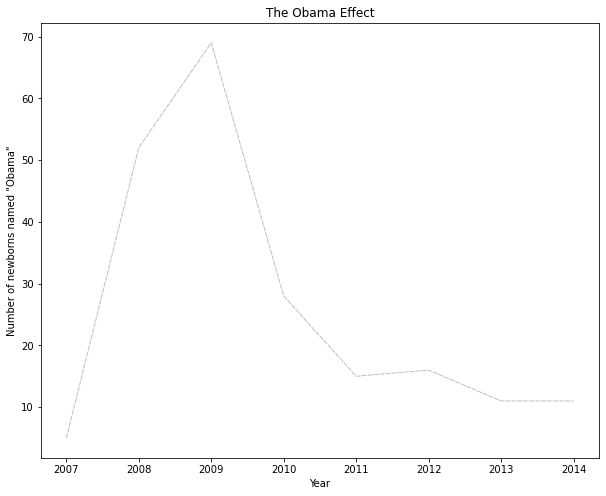

In [29]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# the dark side of khaki
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashed', linewidth=1.)
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

So far, so good. The second part of the strategy is to plot those data-points we have above the line (in full opacity) _as points_. This way, it will be clear that the line is secondary with respect to the the data-points. How can we do this? This is another important principle of `matplotlib` (and other visualization libraries): you create your plot sequentially by adding one plot-stratum at the time, with the last stratum added being the one on top. 

In the case at hand, this means that we will first call `ax.plot()` to draw the linearly-interpolated data -- we have already done this multiple times. After this, we will call `ax.plot()` again to plot the data as points (as opposed to lines!). In this second call to `ax.plot()`, we will change the `linestyle` argument to `'None'` to plot _no_ line. We will change the `color` argument to a solid black, indicated with the color name `'b'`. Then, we will specify a `marker` argument to draw the markers and a `markersize` (or `ms`) argument to make the markers bigger.

In a way, this produce a scatter plot on top of the line we have drawn so far. In fact, we could swap the second `ax.plot()` call with a call to `ax.scatter()` -- the method to draw scatter plots that we will explore tomorrow. The point is that you can overlap in the same `Axes` drawing generated from any method (or function).

 <div class="alert alert-block alert-success">
    <b> Format string </b>: It is possible to condense the two calls of the <code>ax.plot()</code> method to only one call, thanks to the special argument <code>fmt</code> (abbreviation of "format string") of this method. Here, we do not discuss the use of this argument because it is very specific to the <code>ax.plot()</code> method, but check the <a href=https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html>official documentation</a> for an overview of how it works.
        </div>

Text(0, 0.5, 'Number of newborns named "Obama"')

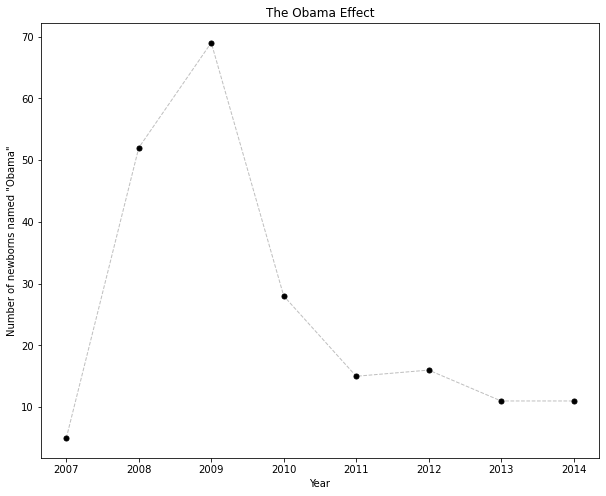

In [37]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Same call as above
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashed', linewidth=1.)
# New line, plot the data as scatter plot. Notice the marker and ms arguments
ax.plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='point', ms=10)
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Exercise 2

Reproduce the same plot as the last one, but 

1. Use a `dashdot` linestyle;
2. Use a different marker of your choice from [this list](https://matplotlib.org/stable/api/markers_api.html);
3. Increase the markersize to 20;
4. Change the color of the markers to any shade of blue.

Text(0, 0.5, 'Number of newborns named "Obama"')

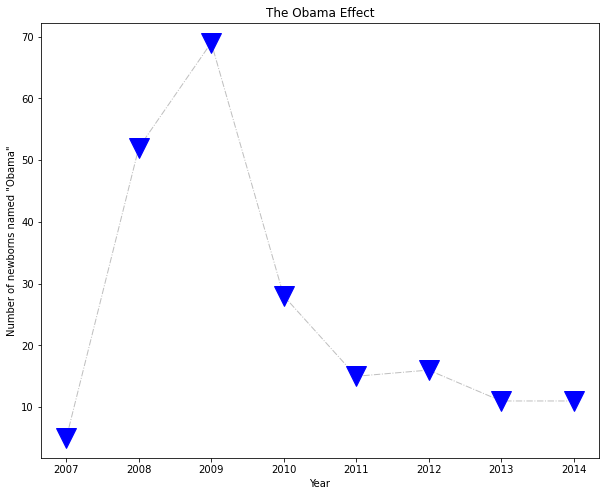

In [38]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Same call as above
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
# New line, plot the data as scatter plot. Notice the marker and ms arguments
ax.plot(barack['Year'], barack['Count'], color=(0,0,1), linestyle='None', marker='v', ms=20)
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

#### Comparing Data